In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [8]:
diamond = pd.read_csv('diamonds.csv')

In [9]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [11]:
diamond.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
diamond.columns
diamond.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamond.describe ()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


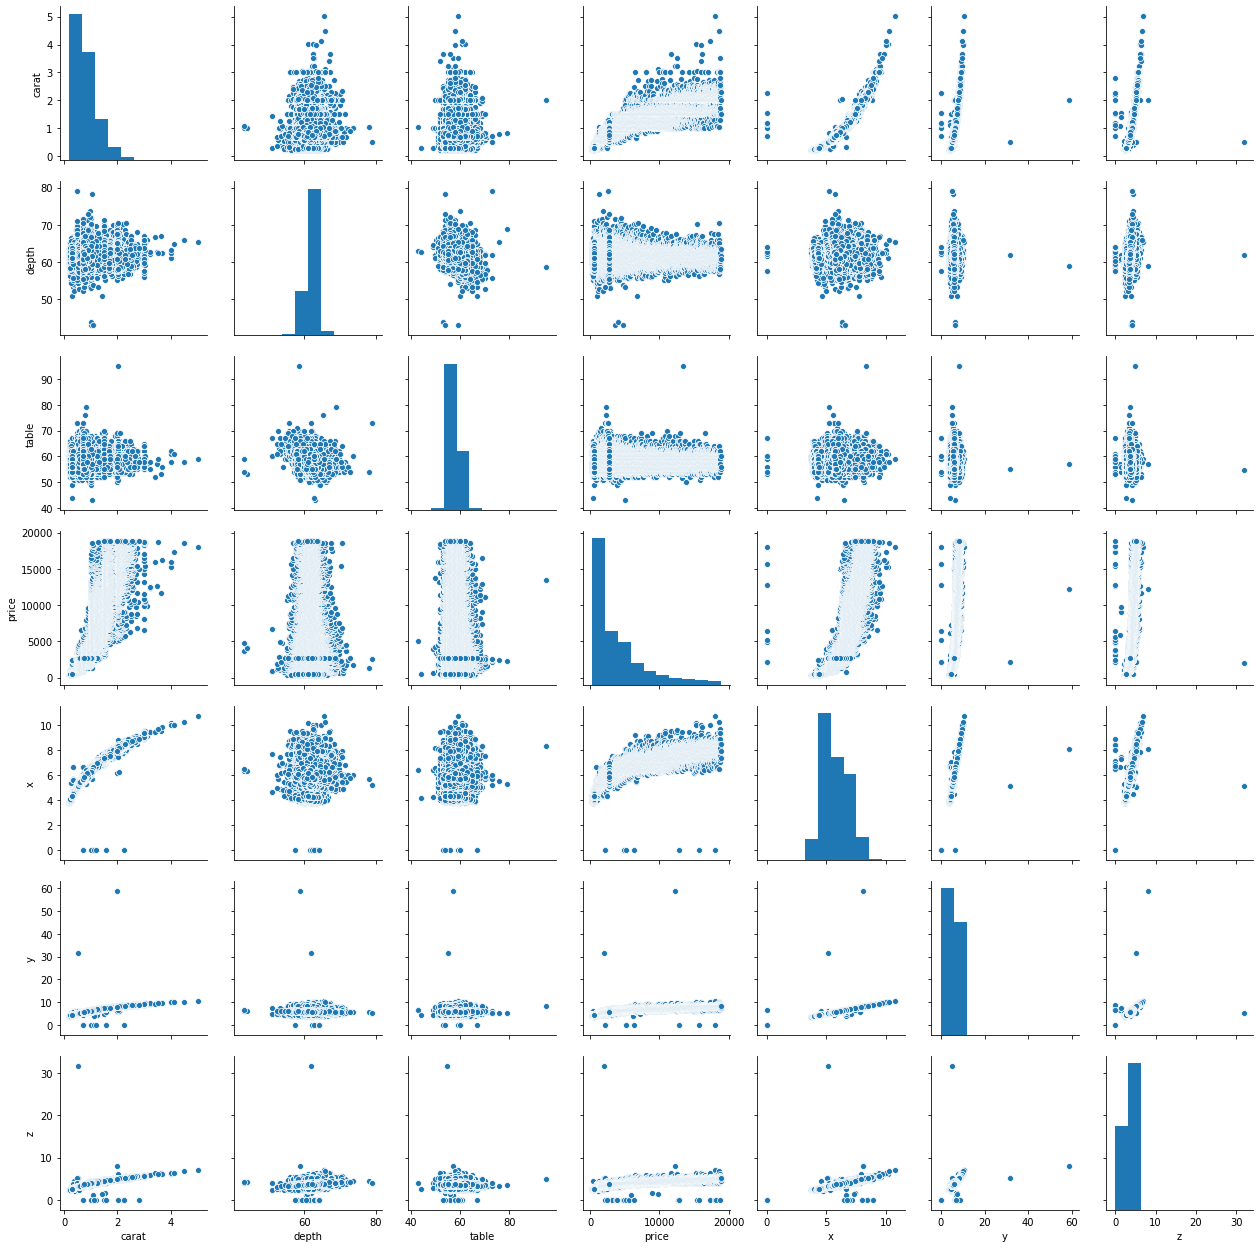

In [13]:
sns.pairplot(diamond)

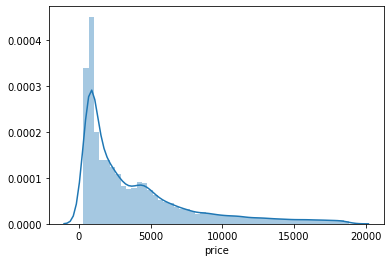

In [14]:
sns.distplot(diamond['price'])

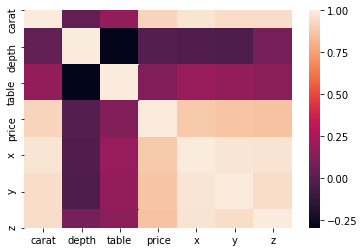

In [15]:
sns.heatmap(diamond.corr())

In [ ]:
#sns.factorplot(data=diamond , kind='box' , size=7, aspect=2.5)

In [ ]:
#sns.kdeplot(diamond['carat'], shade=True , color='b')

In [ ]:
#sns.jointplot(x='carat' , y='price' , data=diamond , size=5)

In [ ]:
#sns.factorplot(x='cut', data=diamond , kind='count',aspect=2.5 )

In [ ]:
#sns.factorplot(x='cut', y='price', data=diamond, kind='box' ,aspect=2.5 )

In [ ]:
#sns.factorplot(x='color', data=diamond , kind='count',aspect=2.5 )

In [ ]:
#sns.factorplot(x='color', y='price' , data=diamond , kind='violin', aspect=2.5)

In [ ]:
#sns.boxplot(x='clarity', y='price', data=diamond)

In [ ]:
#plt.hist('depth' , data=diamond , bins=25)

In [ ]:
#sns.jointplot(x='depth', y='price' , data=diamond , kind='regplot', size=5)

In [ ]:
#sns.kdeplot(diamond['table'] ,shade=True , color='b')

In [25]:
X = diamond[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = diamond['price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression() 

In [31]:
lr.fit(X_train,y_train)

ValueError: could not convert string to float: 'Very Good'

In [22]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

